## Abalone case study

Case Study

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem

A case study of abalone poaching in South Africa 1025. exacerbated the problem and has resulted in devastating eﬀects at local level.
In South Africa, as fisheries management continues to move through a transformation process, it is confronted with a myriad of uncertain scenarios which have the potential to jeopardize its objectives. One such situation, which has proved to be threatening to the sustainable utilization of marine resources, is illegal exploitation. In recent years, South Africa has witnessed an increase in poaching activities, with a particular emphasis on the lucrative abalone industry.

Content :
Here we see the Age, Sex, Length, Height 

Import important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"E:\project flip robo\abalone.csv")

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [6]:
df.drop(index=[1257,3996], inplace = True)
df.shape

(4175, 9)

In [7]:
df['Age'] = df['Rings'] +1.5 #AS per the problem statement
df.drop('Rings', axis = 1, inplace = True)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


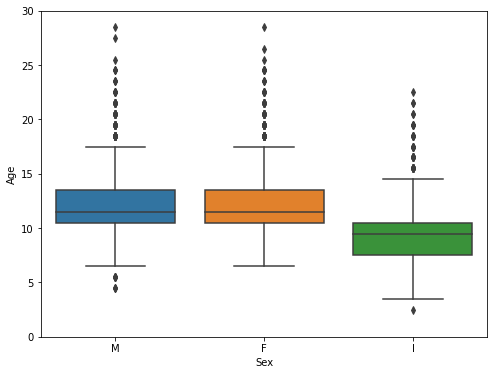

In [8]:
#categorical data
temp = pd.concat([df['Age'], df['Sex']], axis=1)

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Sex', y="Age", data=df)
fig.axis(ymin=0, ymax=30);

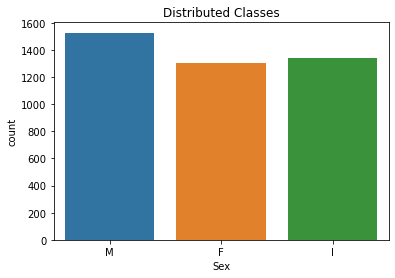

In [9]:
sns.countplot('Sex', data=df)
plt.title('Distributed Classes', fontsize=12)
plt.show()

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

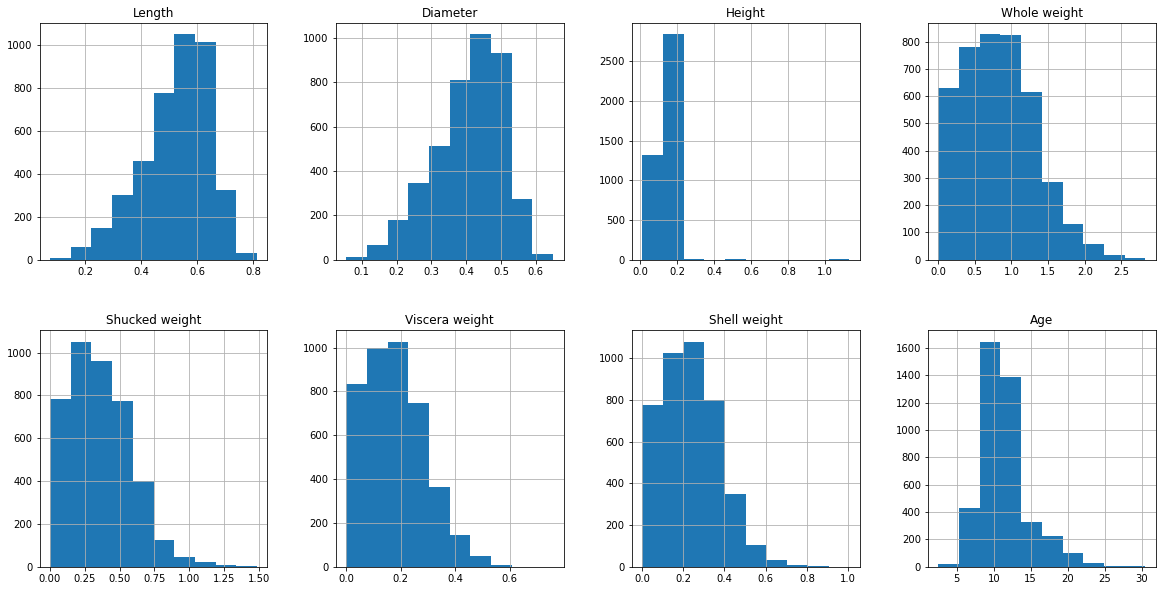

In [10]:
df.hist(figsize = (20,10), layout = (2,4))

In [11]:
#Skewness of the Variables

df.skew().sort_values()

Length           -0.640993
Diameter         -0.610182
Whole weight      0.530549
Viscera weight    0.591455
Shell weight      0.621081
Shucked weight    0.718735
Age               1.113754
Height            3.166364
dtype: float64

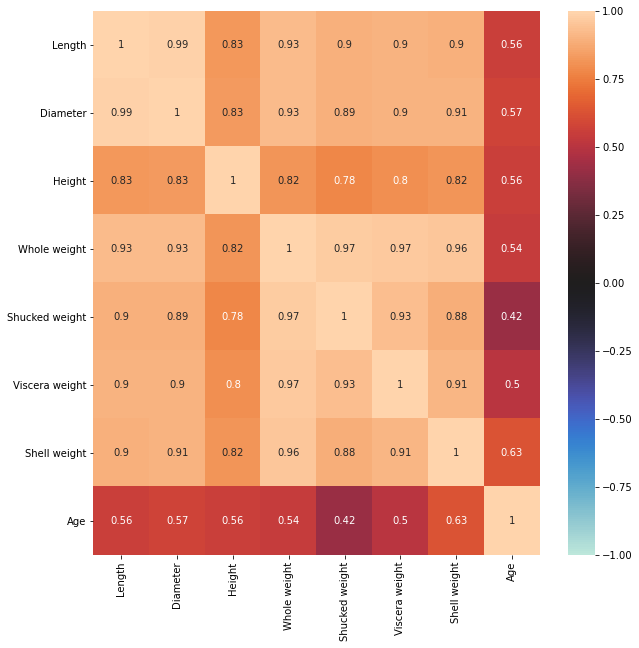

In [12]:
corr = df.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr, vmin = -1, center = 0, annot = True)

In [13]:

df.drop('Shucked weight', axis = 1, inplace = True)

In [14]:
df.drop('Viscera weight', axis = 1, inplace = True)
df.drop('Shell weight', axis = 1, inplace = True)

In [15]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Age
0,M,0.455,0.365,0.095,0.5140,16.5
1,M,0.350,0.265,0.090,0.2255,8.5
2,F,0.530,0.420,0.135,0.6770,10.5
3,M,0.440,0.365,0.125,0.5160,11.5
4,I,0.330,0.255,0.080,0.2050,8.5


Text(0.5, 1.0, 'Height vs Sex')

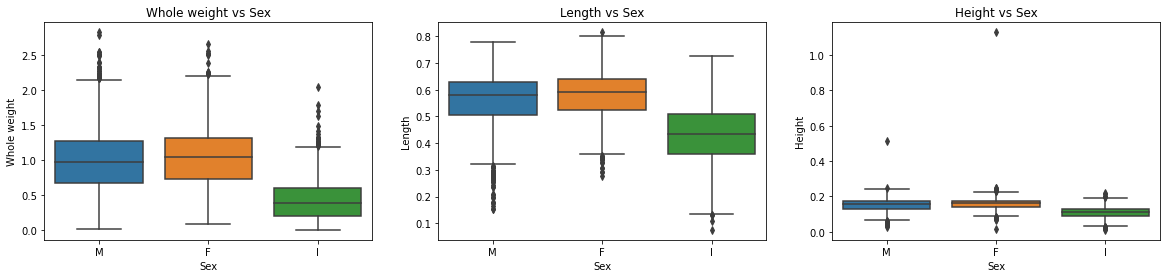

In [16]:
f, axes = plt.subplots(ncols = 3, figsize = (20,4))

sns.boxplot(x = 'Sex', y = 'Whole weight', data = df, ax = axes[0])
axes[0].set_title('Whole weight vs Sex')

sns.boxplot(x = 'Sex', y = 'Length', data = df, ax = axes[1])
axes[1].set_title('Length vs Sex')

sns.boxplot(x = 'Sex', y = 'Height', data = df, ax = axes[2])
axes[2].set_title('Height vs Sex')

In [17]:
df['Height'] = np.sqrt(df['Height'])


In [18]:
df.skew().sort_values()


Length         -0.640993
Diameter       -0.610182
Height         -0.176012
Whole weight    0.530549
Age             1.113754
dtype: float64

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

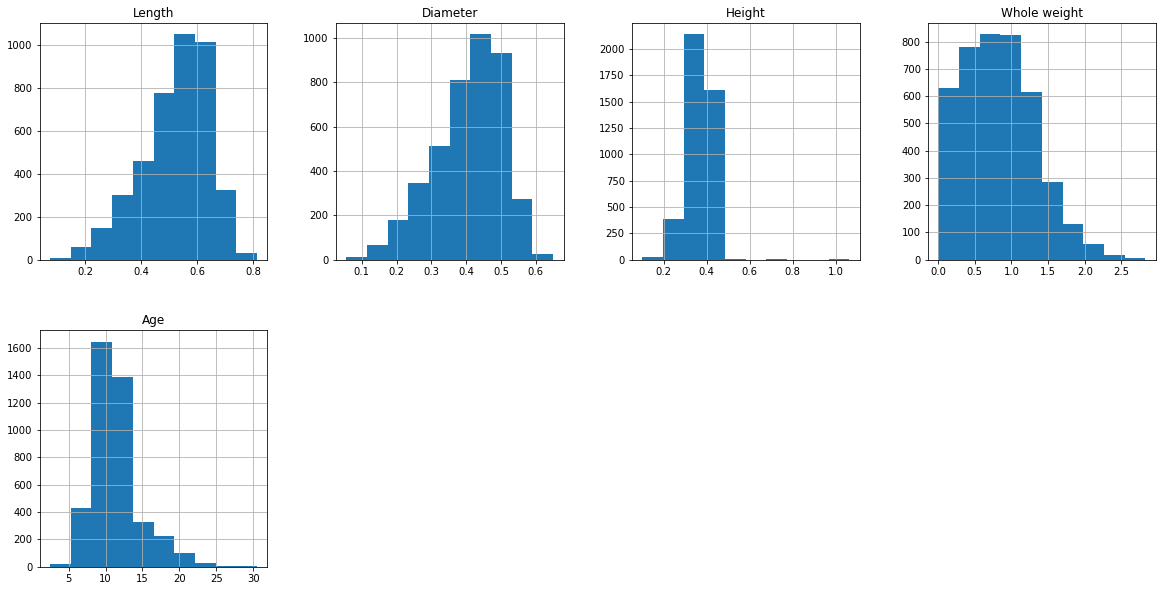

In [19]:
df.hist(figsize = (20,10), layout = (2,4))


## new model

In [20]:
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Age
0,M,0.455,0.365,0.308221,0.5140,16.5
1,M,0.350,0.265,0.300000,0.2255,8.5
2,F,0.530,0.420,0.367423,0.6770,10.5


In [21]:
Age = []
for i in df["Whole weight"]:
    if i < 0.6:
        Age.append(1)
    elif i > 0.6 and i < 1.0 :
        Age.append(2)
    else:
        Age.append(3)
df["age"] = Age
#df_1.drop("Age" , axis =1,inplace=True)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Age,age
0,M,0.455,0.365,0.308221,0.5140,16.5,1
1,M,0.350,0.265,0.300000,0.2255,8.5,1
2,F,0.530,0.420,0.367423,0.6770,10.5,2
3,M,0.440,0.365,0.353553,0.5160,11.5,1
4,I,0.330,0.255,0.282843,0.2050,8.5,1


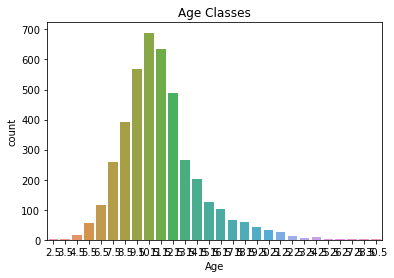

In [22]:
sns.countplot('Age', data=df)
plt.title('Age Classes')
plt.show()

In [23]:
new_df = pd.get_dummies(df, columns = ['Sex'], prefix_sep='_', drop_first = True)
new_df['Age'].value_counts()

10.5    689
11.5    634
9.5     567
12.5    487
8.5     391
13.5    267
7.5     258
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
28.5      2
25.5      2
3.5       1
26.5      1
27.5      1
30.5      1
2.5       1
Name: Age, dtype: int64

In [24]:
X = new_df.drop('age', axis = 1)
y = new_df['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns=X_train.columns)

X_train = X_train_std.values
X_test = X_test_std.values
y_train = y_train.values
y_test = y_test.values

In [27]:
classifiers = {"LogisiticRegression": LogisticRegression(),
               "KNearest": KNeighborsClassifier(),
               "Support Vector Classifier": SVC(),
               "DecisionTreeClassifier": DecisionTreeClassifier()}

## Accuracy

In [28]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 97.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 95.0 % accuracy score
Classifiers:  SVC Has a training score of 96.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score


In [30]:
model = LogisticRegression(C=1000, solver='newton-cg')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('\n','\n' ,confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       305
           2       0.99      0.98      0.99       238
           3       1.00      1.00      1.00       292

    accuracy                           0.99       835
   macro avg       0.99      0.99      0.99       835
weighted avg       0.99      0.99      0.99       835


 
 [[303   2   0]
 [  4 234   0]
 [  0   0 292]]
